In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seoul = pd.read_excel('weather.xlsx')
seoul.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,108,-7.6,-12.7,-3.6
1,2010-01-02,108,-3.6,-7.4,0.2
2,2010-01-03,108,-6.8,-10.5,-3.2
3,2010-01-04,108,-5.9,-8.0,-3.4
4,2010-01-05,108,-9.9,-12.3,-7.0


In [ ]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       4018 non-null   datetime64[ns]
 1   지점       4018 non-null   int64         
 2   평균기온(℃)  4018 non-null   float64       
 3   최저기온(℃)  4018 non-null   float64       
 4   최고기온(℃)  4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 157.1 KB


In [ ]:
a = pd.DataFrame([seoul['날짜'].dt.year])
a

,0,1,2,3,4,5,6,7,8,9,...,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017
날짜,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020


In [ ]:
b = a.transpose()
b

,날짜
0,2010
1,2010
2,2010
3,2010
4,2010
...,...
4013,2020
4014,2020
4015,2020
4016,2020


In [ ]:
new_seoul = pd.concat([seoul, b],axis=1)
new_seoul

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),날짜
0,2010-01-01,108,-7.6,-12.7,-3.6,2010
1,2010-01-02,108,-3.6,-7.4,0.2,2010
2,2010-01-03,108,-6.8,-10.5,-3.2,2010
3,2010-01-04,108,-5.9,-8.0,-3.4,2010
4,2010-01-05,108,-9.9,-12.3,-7.0,2010
...,...,...,...,...,...,...
4013,2020-12-27,108,5.8,1.4,10.0,2020
4014,2020-12-28,108,6.7,4.2,11.4,2020
4015,2020-12-29,108,0.1,-6.2,4.3,2020
4016,2020-12-30,108,-10.9,-12.9,-6.2,2020


In [ ]:
new_seoul.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '날짜'], dtype='object')

In [ ]:
new_seoul.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온', '년도']
new_seoul

,날짜,지점,평균기온,최저기온,최고기온,년도
0,2010-01-01,108,-7.6,-12.7,-3.6,2010
1,2010-01-02,108,-3.6,-7.4,0.2,2010
2,2010-01-03,108,-6.8,-10.5,-3.2,2010
3,2010-01-04,108,-5.9,-8.0,-3.4,2010
4,2010-01-05,108,-9.9,-12.3,-7.0,2010
...,...,...,...,...,...,...
4013,2020-12-27,108,5.8,1.4,10.0,2020
4014,2020-12-28,108,6.7,4.2,11.4,2020
4015,2020-12-29,108,0.1,-6.2,4.3,2020
4016,2020-12-30,108,-10.9,-12.9,-6.2,2020


In [ ]:
new_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4018 non-null   datetime64[ns]
 1   지점      4018 non-null   int64         
 2   평균기온    4018 non-null   float64       
 3   최저기온    4018 non-null   float64       
 4   최고기온    4017 non-null   float64       
 5   년도      4018 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 188.5 KB


In [ ]:
from sklearn import linear_model

seoul_re = linear_model.LinearRegression()

date = [new_seoul['날짜']]
mea = [new_seoul['평균기온']]

seoul_re.fit(date, mea)

LinearRegression()

In [ ]:
coef = seoul_re.coef_
intercept = seoul_re.intercept_

score = seoul_re.score(date, mea)

TypeError: ignored

 ...]

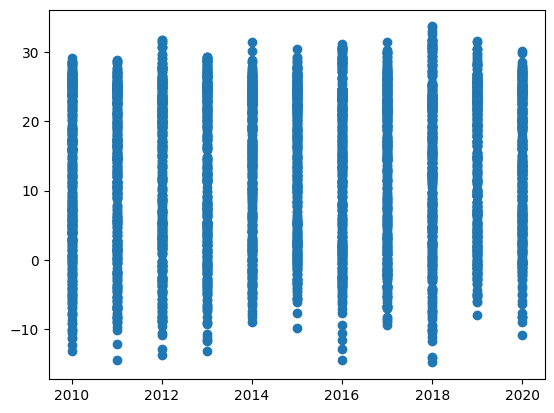

In [ ]:
plt.scatter(date, mea)
mea_pred = seoul_re.predict(date)
plt.plot(date, mea_pred, 'r')

In [ ]:
from sklearn.model_selection import StratifiedGroupKFold

splitter = StratifiedGroupKFold(n_splits = 10, shuffle = True, random_state = 42 )
scores = cross_validate(dt, train_input, train_trget, cv=StratifiedGroupKFold())
print(np.mean(scores['test_score']))

In [29]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [30]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [32]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [35]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state=42)

In [36]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

DecisionTreeClassifier(random_state=42)

In [40]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.02910113, 0.02577353, 0.02811956, 0.02521348, 0.02263689]), 'score_time': array([0.00577974, 0.00223017, 0.00237226, 0.00200105, 0.0020349 ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [41]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


In [44]:
from sklearn.model_selection import StratifiedGroupKFold

splitter = StratifiedGroupKFold(n_splits = 10, shuffle = True, random_state = 42 )
scores = cross_validate(dt, train_input, train_target, cv=StratifiedGroupKFold())
print(np.mean(scores['test_score']))

nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 426, in predict
    X = self._validate_X_predict(X, check_input)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 392, in _validate_X_predict
    X = self._validate_data(X, dtype=DT

In [45]:
from sklearn.model_selection import GridSearchCV

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [51]:
from sklearn.preprocessing import StandardScaler
features = iris['feature_names']
x = df.loc[:, features].values
y = df.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)
principalDf = pd.DataFrame(data = pca_result, columns = ['PC1', 'PC2'])

In [54]:
finalDF = pd.concat([principalDf, df[['target']]], axis =1)

TypeError: ignored

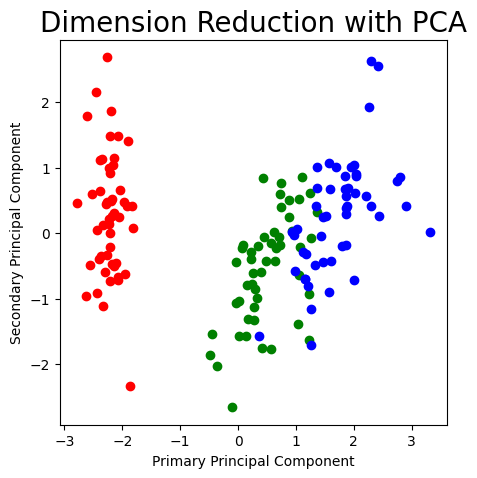

In [58]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Primary Principal Component')
ax.set_ylabel('Secondary Principal Component')
ax.set_title('Dimension Reduction with PCA', fontsize=20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
  idx = finalDF['target'] == target
  ax.scatter(finalDF.loc[idx, 'PC1'], finalDF.loc[idx, 'PC2'], c = color)

ax.legend(target)
ax.grid()

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [62]:
df = pd.read_csv('/content/movie_genre_final.csv')
df.head()

,id,original_title,target,vote_average,Action,Adventure,Fantasy,ScienceFiction,Crime,Drama,...,Mystery,History,War,Music,Documentary,Foreign,TVMovie,director,cast,keywords
0,19995,Avatar,7,7.2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,James Cameron,"SamWorthington,SigourneyWeaver,StephenLang,Zoe...","['culture clash', 'future', 'space war', 'spac..."
1,285,Pirates of the Caribbean: At World's End,7,6.9,1,1,1,0,0,0,...,0,0,0,0,0,0,0,Gore Verbinski,"JohnnyDepp,KeiraKnightley,OrlandoBloom,Stellan...","['ocean', 'drug abuse', 'exotic island', 'east..."
2,206647,Spectre,6,6.3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,Sam Mendes,"ChristophWaltz,DanielCraig,LéaSeydoux,RalphFie...","['spy', 'based on novel', 'secret agent', 'seq..."
3,49026,The Dark Knight Rises,8,7.6,1,0,0,0,1,1,...,0,0,0,0,0,0,0,Christopher Nolan,"AnneHathaway,ChristianBale,GaryOldman,MichaelC...","['dc comics', 'crime fighter', 'terrorist', 's..."
4,49529,John Carter,6,6.1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,Andrew Stanton,"LynnCollins,SamanthaMorton,TaylorKitsch,Willem...","['based on novel', 'mars', 'medallion', 'space..."


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4775 entries, 0 to 4774
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4775 non-null   int64  
 1   original_title  4775 non-null   object 
 2   target          4775 non-null   int64  
 3   vote_average    4775 non-null   float64
 4   Action          4775 non-null   int64  
 5   Adventure       4775 non-null   int64  
 6   Fantasy         4775 non-null   int64  
 7   ScienceFiction  4775 non-null   int64  
 8   Crime           4775 non-null   int64  
 9   Drama           4775 non-null   int64  
 10  Thriller        4775 non-null   int64  
 11  Animation       4775 non-null   int64  
 12  Family          4775 non-null   int64  
 13  Western         4775 non-null   int64  
 14  Comedy          4775 non-null   int64  
 15  Romance         4775 non-null   int64  
 16  Horror          4775 non-null   int64  
 17  Mystery         4775 non-null   i

In [ ]:
Action = df[Action]
if Action == 1


In [ ]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, ('Action', 'Adventure', 'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery','History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie'), )